In [16]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import chain, simpleRFM, seqRFM, eulerN, eulerSame
import torch
from torch import nn
import copy
# warnings.filterwarnings('ignore')

save_folder = '../data/comparsions'
def stitch_data(X):
    return ((X.T).reshape(-1, B*D)).T

def pair_sort(X, Y):
    return [x for _,x in sorted(zip(Y,X), key = lambda pair: pair[0])][::-1]

L0, L1 = 0.4, 3.5
D, D_r, B = 3, 256, 4
beta, N = 7e-8, 20000
m, n_repeats = 500, 500
batch_size, save_best = 100, True
error_threshold, dt, max_LE = 0.05, 0.02, 0.91
tau_f_kwargs = {'error_threshold' : error_threshold, 'dt': dt, 'Lyapunov_time': 1/max_LE}

Uo1 = torch.tensor(np.load('../data/L63-trajectories/train1.npy'))
UoB = torch.tensor(np.load(f'../data/L63-trajectories/train{B}.npy'))
SUoB = stitch_data(UoB)
Vo = torch.tensor(np.load('../data/L63-trajectories/test.npy'))
VoB = torch.tensor(np.load(f'../data/L63-trajectories/test{B}.npy'))

**Run Batch Experiments**

In [17]:
#Create one layer SimpleRFM with $D_r=256\times 4=1024$#

name = 'simple_rfm'
simple_rfm = simpleRFM.BatchDeepRF(Uo1, Vo, D_r*B, 1, L0, L1, Uo1, beta, name, f'{save_folder}/{name}')
# simple_rfm.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {simple_rfm.drf.name} is {simple_rfm.drf.count_params()}')

#Create multilayer SimpleRFM with $D_r=256$#

name = 'simple_rfm_concat'
simple_rfm_concat = simpleRFM.BatchDeepRF(UoB, Vo, D_r, B, L0, L1, UoB, beta, name, f'{save_folder}/{name}')
# simple_rfm_concat.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {simple_rfm_concat.drf.name} is {simple_rfm_concat.drf.count_params()}')

#Create one layer SeqRFM with $D_r=448$#

name = 'seq_rfm'
D_r_ = int(np.ceil(D_r*((2*D+1)/(D+(D+1.)/B))))
seq_rfm = seqRFM.BatchDeepRF(UoB, VoB, D_r_, B, L0, L1, SUoB, beta, name, f'{save_folder}/{name}')
# seq_rfm.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {seq_rfm.drf.name} is {seq_rfm.drf.count_params()}')

#Create multilayer EulerSame with $D_r=256$#

name = 'euler_same'
euler_same = eulerSame.BatchDeepRF(UoB, Vo, D_r, B, L0, L1, UoB, beta, name, f'{save_folder}/{name}')
# euler_same.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {euler_same.drf.name} is {euler_same.drf.count_params()}')

#Create multilayer Euler with $D_r=256$#

name = 'euler'
euler = eulerN.BatchDeepRF(Uo1, Vo, D_r, B, L0, L1, Uo1, beta, name, f'{save_folder}/{name}')
print(f'Number of paramters in {euler.drf.name} is {euler.drf.count_params()}')
euler.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
#Create multilayer SkipRFM with $D_r=256$#

name = 'skip_rfm'
skip_rfm = eulerN.BatchDeepRF(Uo1, Vo, D_r*B, 1, L0, L1, UoB, beta, name, f'{save_folder}/{name}')
print(f'Number of paramters in {skip_rfm.drf.name} is {skip_rfm.drf.count_params()}')
# skip_rfm.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)

#Create one layer SkipRFM with $D_r=256$#
name = 'skip_rfm_unit'
skip_rfm_unit = eulerN.BatchDeepRF(UoB, VoB, D_r, 1, L0, L1, UoB, beta, name, f'{save_folder}/{name}')
new_tau_f_kwargs = tau_f_kwargs.copy()
new_tau_f_kwargs['dt'] = dt/B
# skip_rfm_unit.run(N, n_repeats, batch_size, save_best, **new_tau_f_kwargs)
print(f'Number of paramters in {skip_rfm_unit.drf.name} is {skip_rfm_unit.drf.count_params()}')

#Create one layer SimpleRFM with $D_r=256$#
name = 'simple_rfm_unit'
simple_rfm_unit = simpleRFM.BatchDeepRF(UoB, VoB, D_r, 1, L0, L1, Uo1, beta, name, f'{save_folder}/{name}')
# simple_rfm_unit.run(N, n_repeats, batch_size, save_best, **new_tau_f_kwargs)
print(f'Number of paramters in {simple_rfm_unit.drf.name} is {simple_rfm_unit.drf.count_params()}')

#Create one layer SkipRFM with $D_r=256$#
name = 'skip_rfm_unit_1'
skip_rfm_unit_1 = eulerN.BatchDeepRF(Uo1, Vo, D_r, 1, L0, L1, Uo1, beta, name, f'{save_folder}/{name}')
# skip_rfm_unit_1.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {skip_rfm_unit_1.drf.name} is {skip_rfm_unit_1.drf.count_params()}')

#Create one layer SimpleRFM with $D_r=256$#
name = 'simple_rfm_unit_1'
simple_rfm_unit_1 = simpleRFM.BatchDeepRF(Uo1, Vo, D_r, 1, L0, L1, Uo1, beta, name, f'{save_folder}/{name}')
# simple_rfm_unit_1.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {simple_rfm_unit_1.drf.name} is {simple_rfm_unit_1.drf.count_params()}')

#Create one layer SkipRFMFine with $D_r=256$#
name = 'skip_rfm_fine'
skip_rfm_fine = eulerN.BatchDeepRF(UoB, VoB, D_r*B, 1, L0, L1, UoB, beta, name, f'{save_folder}/{name}')
print(f'Number of paramters in {skip_rfm_fine.drf.name} is {skip_rfm_fine.drf.count_params()}')
# skip_rfm_fine.run(N, n_repeats, batch_size, save_best, **new_tau_f_kwargs)

expr = [simple_rfm, simple_rfm_concat, seq_rfm, euler_same, euler, skip_rfm, skip_rfm_unit, simple_rfm_unit,\
        skip_rfm_unit_1, simple_rfm_unit_1, skip_rfm_fine]
input_dim = [D, D, B*D, D, D, D, D, D, D, D, D]
input_dt = [dt, dt/B, dt/B, dt/B, dt/B, dt, dt/B, dt/B, dt, dt, dt/B]
output_dt = [dt, dt, dt/B, dt, dt, dt, dt/B, dt/B, dt, dt, dt/B]
mean_tau = [batch.get_data()['tau_f_se'].mean() for batch in expr]
std_tau = [batch.get_data()['tau_f_se'].std() for batch in expr]
mean_vpt = [batch.get_data()['tau_f_nmse'].mean() for batch in expr]
std_vpt = [batch.get_data()['tau_f_nmse'].std() for batch in expr]

# sort data
expr = pair_sort(expr, mean_tau)
std_tau = pair_sort(std_tau, mean_tau)
mean_vpt = pair_sort(mean_vpt, mean_tau)
std_vpt = pair_sort(std_vpt, mean_tau)
input_dim = pair_sort(input_dim, mean_tau)
input_dt = pair_sort(input_dt, mean_tau)
output_dt = pair_sort(output_dt, mean_tau)
mean_tau = pair_sort(mean_tau, mean_tau) # has to be last list to be sorted

Number of paramters in simple_rfm is 7168
Number of paramters in simple_rfm_concat is 7168
Number of paramters in seq_rfm is 7168
Number of paramters in euler_same is 7168
Number of paramters in euler is 7168
Running experiments for batch 0...
Time taken = 3.43E+01s
Running experiments for batch 1...
Time taken = 3.49E+01s
Running experiments for batch 2...
Time taken = 3.68E+01s
Running experiments for batch 3...
Time taken = 3.85E+01s
Running experiments for batch 4...
Time taken = 3.85E+01s
Saving the best and worst models ...
Time taken by learn is 0.1000 seconds
Time taken by learn is 0.0949 seconds
Time taken by run is 183.2724 seconds
Number of paramters in skip_rfm is 7168
Number of paramters in skip_rfm_unit is 1792
Number of paramters in simple_rfm_unit is 1792
Number of paramters in skip_rfm_unit_1 is 1792
Number of paramters in simple_rfm_unit_1 is 1792
Number of paramters in skip_rfm_fine is 7168
Running experiments for batch 0...
Time taken = 5.90E+01s
Running experiments

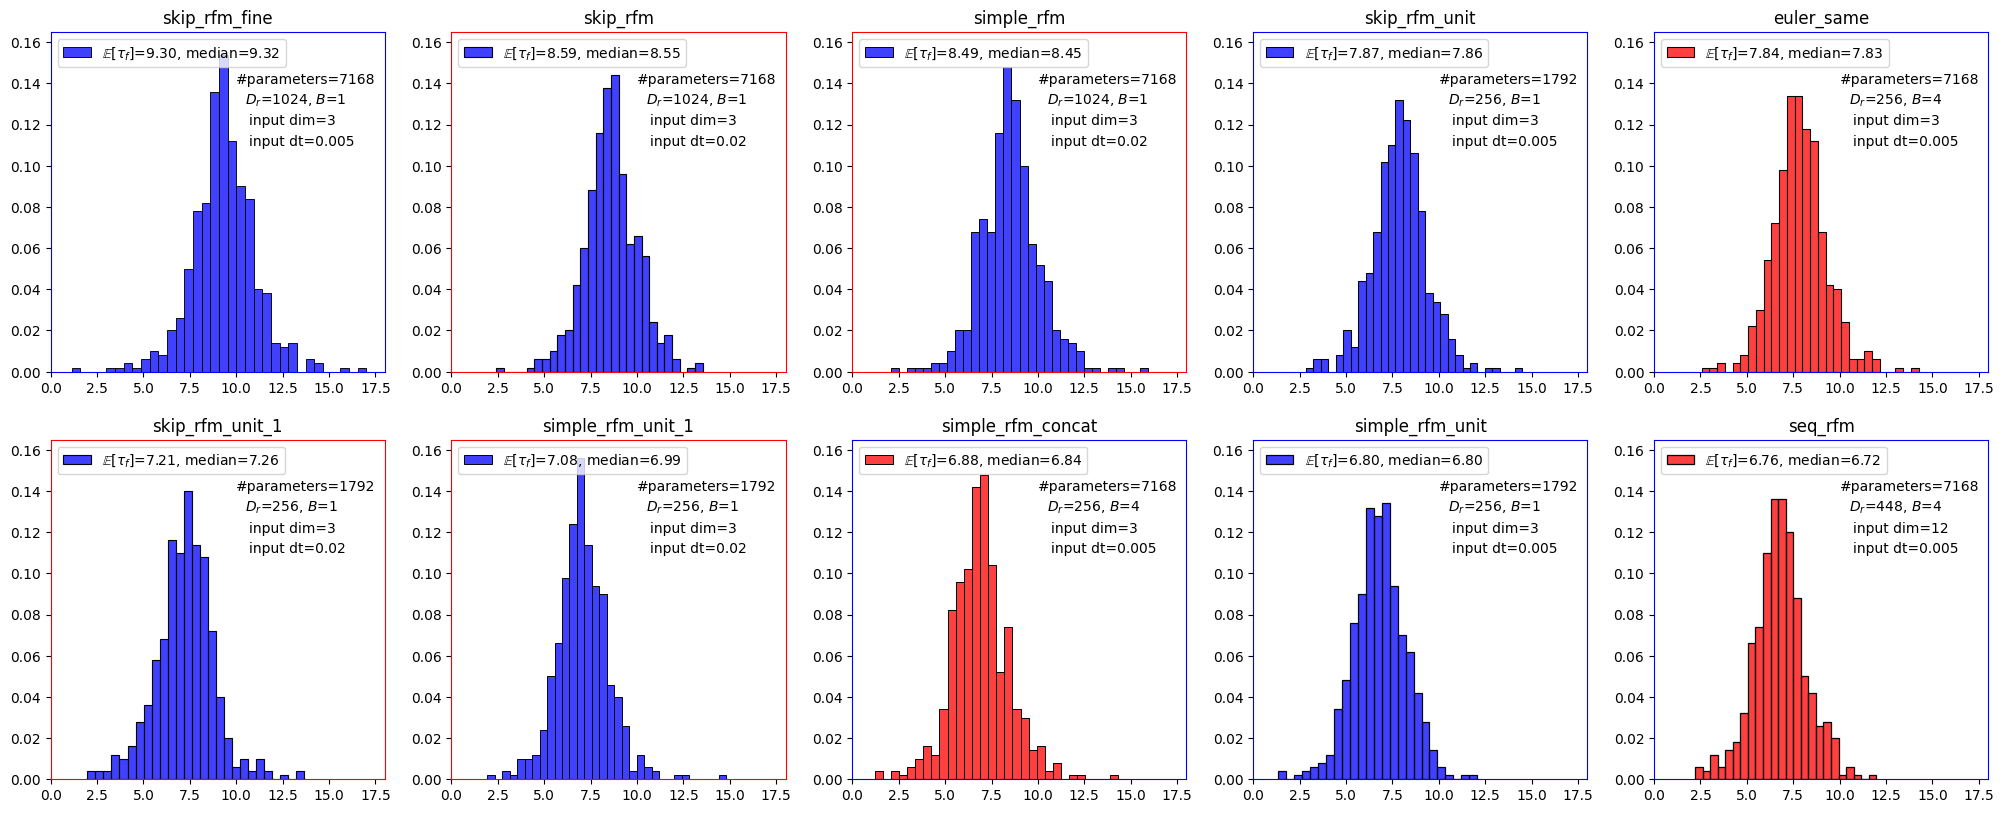

Time taken by learn is 0.2159 seconds
Time taken by learn is 0.1662 seconds
Time taken by learn is 0.1788 seconds
Time taken by learn is 0.1677 seconds
Time taken by learn is 0.1820 seconds
Time taken by learn is 0.1883 seconds
Time taken by learn is 0.1653 seconds
Time taken by learn is 0.1817 seconds
Time taken by learn is 0.1657 seconds
Time taken by learn is 0.1645 seconds
Time taken by learn is 0.1730 seconds
Time taken by learn is 0.1654 seconds
Time taken by learn is 0.1846 seconds
Time taken by learn is 0.1650 seconds
Time taken by learn is 0.1637 seconds
Time taken by learn is 0.1669 seconds
Time taken by learn is 0.1790 seconds
Time taken by learn is 0.1739 seconds
Time taken by learn is 0.1665 seconds
Time taken by learn is 0.1668 seconds
Time taken by learn is 0.1840 seconds
Time taken by learn is 0.1723 seconds
Time taken by learn is 0.1669 seconds
Time taken by learn is 0.1665 seconds
Time taken by learn is 0.1664 seconds
Time taken by learn is 0.1645 seconds
Time taken b

In [18]:
fig = plt.figure(figsize=(25, 15))
axs = [fig.add_subplot(3, 5, i+1) for i in range(10)]
for i, ax in enumerate(axs):
    tau = expr[i].get_data()['tau_f_se']
    color = 'red' if expr[i].drf.net.B > 1 else 'blue'
    sns.histplot(tau, ax=ax, stat='probability', label=r'$\mathbb{E}[\tau_f]$='+f'{tau.mean():.2f}, '+f'median={tau.median():.2f}', color=color)
    ax.set_title(f'{expr[i].drf.name}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 0.165)
    ax.text(10, 0.14, f'#parameters={expr[i].drf.count_params()}')
    ax.text(10.5, 0.13, fr'$D_r$={expr[i].drf.net.D_r}, $B$={expr[i].drf.net.B}')
    ax.text(10.7, 0.12, fr'input dim={input_dim[i]}')
    ax.text(10.7, 0.11, fr'input dt={input_dt[i]}')
    # ax.text(10.7, 0.10, fr'dt={output_dt[i]}')
    ax.legend(loc='upper left')
    if input_dt[i] == dt:
        for spine in ax.spines.values():
            spine.set_edgecolor('red')
    else:
        for spine in ax.spines.values():
            spine.set_edgecolor('blue')
plt.savefig(f'{save_folder}/tau_f.png', bbox_inches='tight', dpi=300)

Conclusions: 1) predicting for lower dt is better than predicting for higher dt (11 vs 22), (14 vs 24) <br>
2) predicting for lower dt is better than model size (11 vs 12, 15, 21, 23, 25), (14 vs 15, 21, 23, 25) <br>
3) passing a sequence is inefficient (11 vs 13) <br>
4) immediate skipping is better than not skipping (11 vs 14), (22 vs 24), (15 vs 25) <br>
5) variety does not have a lot of impact on Euler (15 vs 21) => Parameter sharing is possible<br> 
6) width is more helpful than depth (12 vs 15) (23 vs 25) <br>
7) higher depth is better when width is kept constant for Euler (15, 21 vs 22) <br>


**Best-Worst-Mixed Euler and SimpleRFMConcat**

In [9]:
euler_best = copy.deepcopy(euler.drf)
best = skip_rfm_unit.get_model('best').get_block_params(0)
euler_best.block_update(list(range(B)), [best[0]]*B, [best[1]]*B, [best[2]]*B)

euler_worst = copy.deepcopy(euler.drf)
worst = skip_rfm_unit.get_model('worst').get_block_params(0)
euler_worst.block_update(list(range(B)), [worst[0]]*B, [worst[1]]*B, [worst[2]]*B)

euler_mixed = copy.deepcopy(euler.drf)
euler_mixed.block_update(list(range(B)), [best[0], worst[0]]*int(B/2), [best[1], worst[1]]*int(B/2), [best[2], worst[2]]*int(B/2))

euler_best.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='best')
euler_worst.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='worst')
euler_mixed.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='mixed')

euler_tau_best = euler_best.read_tau_f('best').numpy()
euler_tau_worst = euler_worst.read_tau_f('worst').numpy()
euler_tau_mixed = euler_mixed.read_tau_f('mixed').numpy()


simple_rfm_concat_best = copy.deepcopy(simple_rfm_concat.drf)
best = simple_rfm_unit.get_model('best').get_block_params(0)
simple_rfm_concat_best.block_update(list(range(B)), [best[0]]*B, [best[1]]*B, [best[2]]*B)

simple_rfm_concat_worst = copy.deepcopy(simple_rfm_concat.drf)
worst = simple_rfm_unit.get_model('worst').get_block_params(0)
simple_rfm_concat_worst.block_update(list(range(B)), [worst[0]]*B, [worst[1]]*B, [worst[2]]*B)

simple_rfm_concat_mixed = copy.deepcopy(simple_rfm_concat.drf)
simple_rfm_concat_mixed.block_update(list(range(B)), [best[0], worst[0]]*int(B/2), [best[1], worst[1]]*int(B/2), [best[2], worst[2]]*int(B/2))


# simple_rfm_concat_best.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='best')
# simple_rfm_concat_worst.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='worst')
# simple_rfm_concat_mixed.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='mixed')

simple_rfm_concat_tau_best = simple_rfm_concat_best.read_tau_f('best').numpy()
simple_rfm_concat_tau_worst = simple_rfm_concat_worst.read_tau_f('worst').numpy()
simple_rfm_concat_tau_mixed = simple_rfm_concat_mixed.read_tau_f('mixed').numpy()

all_tau = [euler_tau_best, euler_tau_worst, euler_tau_mixed, \
           simple_rfm_concat_tau_best, simple_rfm_concat_tau_worst, simple_rfm_concat_tau_mixed]
names = ['euler_best', 'euler_worst', 'euler_mixed', 'simple_rfm_concat_best', 'simple_rfm_concat_worst', 'simple_rfm_concat_mixed']
mean_all_tau = [float(tau.mean()) for tau in all_tau]
all_tau = pair_sort(all_tau, mean_all_tau)
names = pair_sort(names, mean_all_tau)
mean_all_tau = pair_sort(mean_all_tau, mean_all_tau)

Time taken by compute_tau_f is 29.1407 seconds
Time taken by compute_tau_f is 29.3803 seconds
Time taken by compute_tau_f is 29.1129 seconds


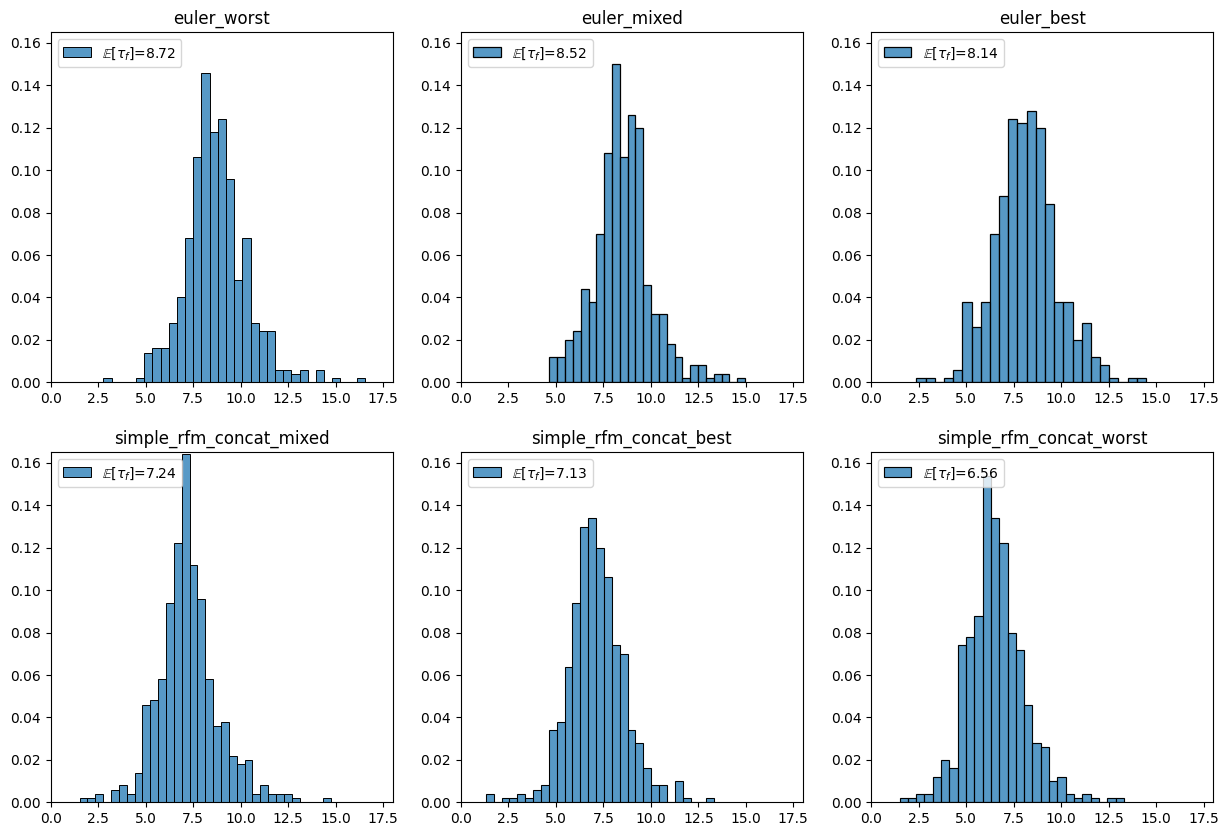

In [10]:
fig = plt.figure(figsize=(15, 10))
axs = [fig.add_subplot(2, 3, i+1) for i in range(6)]
for i, ax in enumerate(axs):
    tau = all_tau[i]
    sns.histplot(tau, ax=ax, stat='probability', label=r'$\mathbb{E}[\tau_f]$='+f'{tau.mean():.2f}')
    ax.set_title(f'{names[i]}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 0.165)
    ax.legend(loc='upper left')
  
plt.savefig(f'{save_folder}/best_worst_mixed.png', bbox_inches='tight', dpi=300)

Conclusions: <br>
0) skip better than no skip <br> 1) Mixed , Best Same > Worst Same <br>

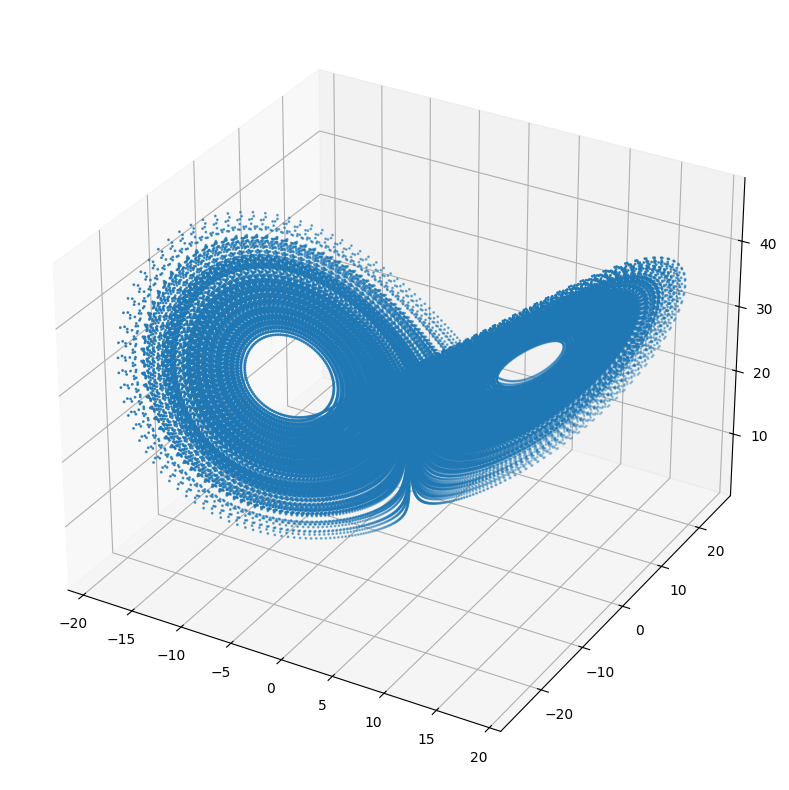

In [62]:
attractor_skip_rfm_unit_worst = skip_rfm_unit.get_model('worst').multistep_forecast(Vo[0, :, 0], 100000)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(attractor_skip_rfm_unit_worst[0, :], attractor_skip_rfm_unit_worst[1, :], attractor_skip_rfm_unit_worst[2, :], s=1)

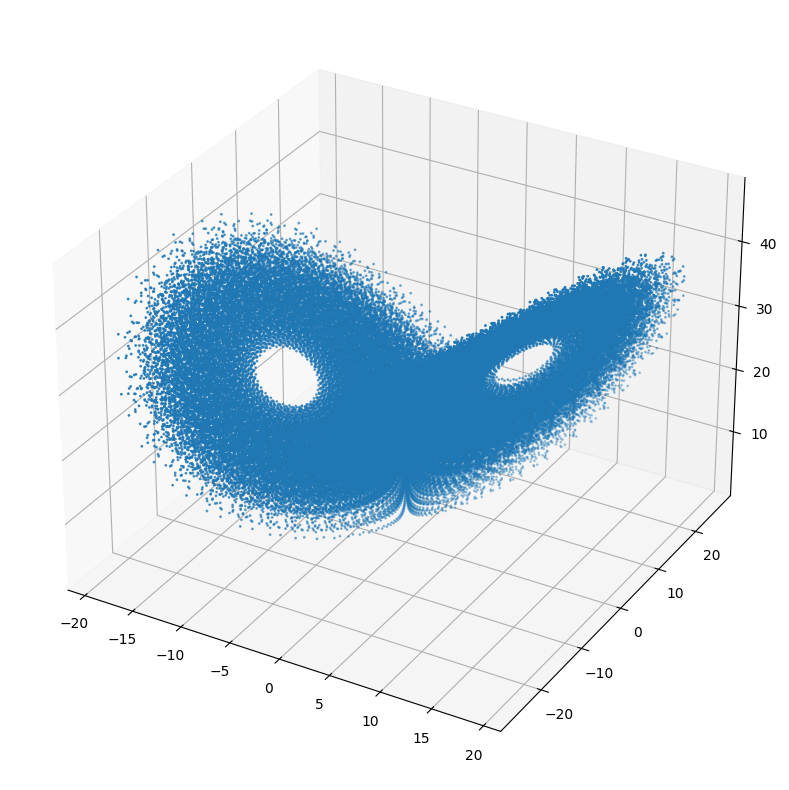

In [65]:
attractor_euler_worst = euler.get_model('worst').multistep_forecast(Vo[0, :, 0], 100000)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(attractor_euler_worst[0, :], attractor_euler_worst[1, :], attractor_euler_worst[2, :], s=1)

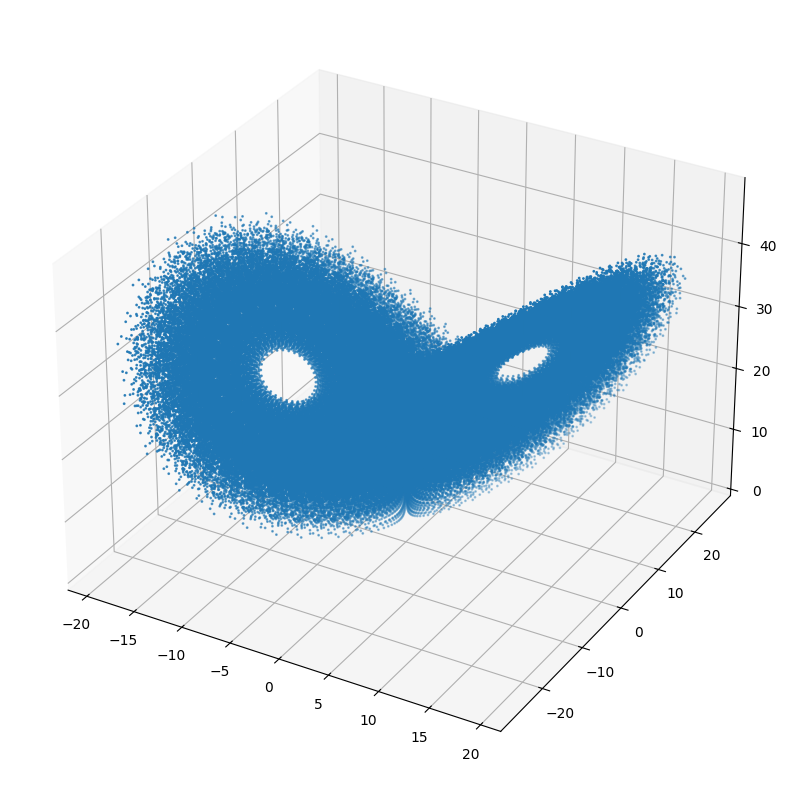

In [67]:
# attractor_euler_worst = euler.get_model('worst').multistep_forecast(Vo[0, :, 0], 100000)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Uo1[0, :], Uo1[1, :], Uo1[2, :], s=1)

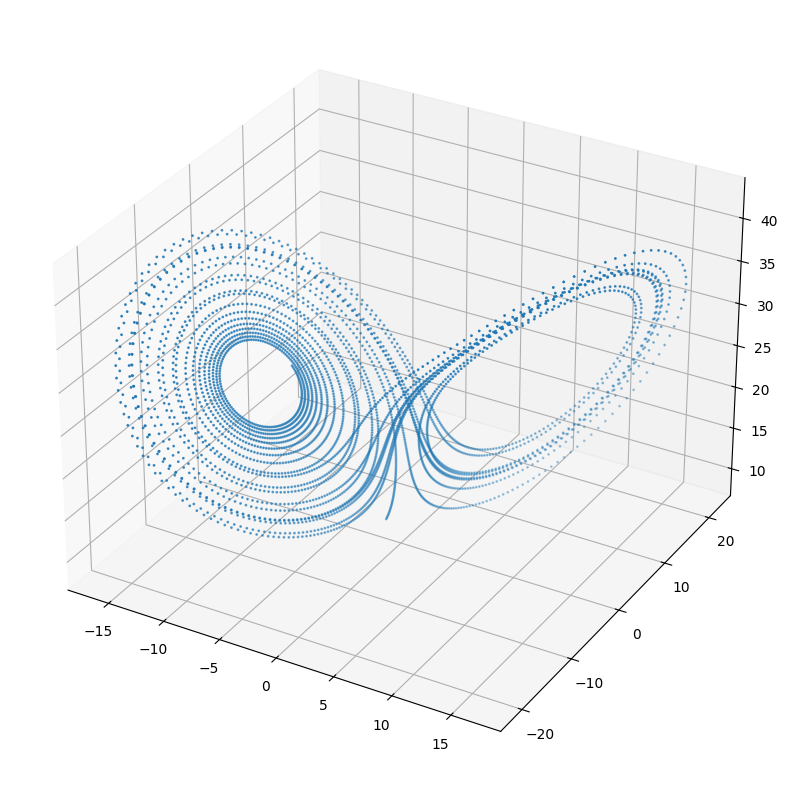

In [73]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(VoB[0, 0,:], VoB[0, 1, :], VoB[0, 2, :], s=1)

In [74]:
2000*0.005

10.0